# clip-05s.jl

Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan
#gr(size=(600,800));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchains.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchains);


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/03/tmp/binomial.stan will be updated.



Use 16 observations

In [5]:
N2 = 4^2
d = Binomial(9, 0.66)
n2 = Int.(9 * ones(Int, N2))
k2 = rand(d, N2);

Input data for cmdstan

In [6]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [7]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);

Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.023, 0.030, 0.025, 0.028) seconds, 0.11 seconds total
Sampling took (0.037, 0.045, 0.034, 0.035) seconds, 0.15 seconds total

                Mean     MCSE  StdDev     5%   50%   95%  N_Eff  N_Eff/s    R_hat
lp__             -98  2.8e-02     1.1   -100   -97   -97   1655    10995  1.0e+00
accept_stat__   0.89  9.1e-03    0.14   0.59  0.95   1.0    249     1655  1.0e+00
stepsize__      0.87  5.3e-02   0.075   0.77  0.93  0.96    2.0       13  5.0e+13
treedepth__      1.9  7.3e-02    0.59    1.0   2.0   3.0     65      432  1.0e+00
n_leapfrog__     3.9  5.0e-01     3.4    1.0   3.0   9.0     46      308  1.0e+00
divergent__     0.00  0.0e+00    0.00   0.00  0.00  0.00   2000    13285      nan
energy__          99  3.9e-02     1.6     97    98   102   1557    10341  1.0e+00
theta           0.65  7.2e-04   0.040   0.58  0.65  0.71

Describe the draws

In [8]:
describe(chn)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean    │ std       │ naive_se   │ mcse        │ ess     │
│     │ Symbol     │ Float64 │ Float64   │ Float64    │ Float64     │ Any     │
├─────┼────────────┼─────────┼───────────┼────────────┼─────────────┼─────────┤
│ 1   │ theta      │ 0.6451  │ 0.0402482 │ 0.00063638 │ 0.000599806 │ 3166.95 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%   │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64 │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼─────────┼──────────┤
│ 1   │ theta      │ 0.565322 │ 0.618459 │ 0.645747 │ 0.67191 │ 0.723424 │


Plot the 4 chains

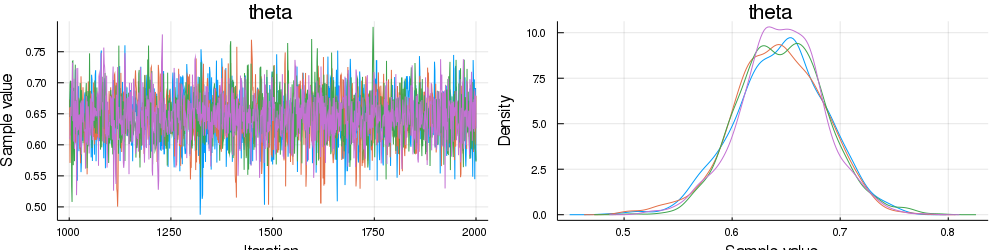

In [9]:
if rc == 0
  plot(chn)
end

End of `03/clip-05s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*